### Logistic Regression task

- 기계 센서 데이터를 통해 고장 여부를 예측하는 분류기를 모델화한다.

In [1]:
import pandas as pd

m_df = pd.read_csv('./datasets/machine.csv')
m_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9810,1604,29.5,14,0,0,0,0,0
9811,1632,31.8,17,0,0,0,0,0
9812,1645,33.4,22,0,0,0,0,0
9813,1408,48.5,25,0,0,0,0,0


In [2]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rotational speed [rpm]  9815 non-null   int64  
 1   Torque [Nm]             9815 non-null   float64
 2   Tool wear [min]         9815 non-null   int64  
 3   TWF                     9815 non-null   int64  
 4   HDF                     9815 non-null   int64  
 5   PWF                     9815 non-null   int64  
 6   OSF                     9815 non-null   int64  
 7   Machine failure         9815 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 613.6 KB


In [3]:
m_df.isna().sum()

Rotational speed [rpm]    0
Torque [Nm]               0
Tool wear [min]           0
TWF                       0
HDF                       0
PWF                       0
OSF                       0
Machine failure           0
dtype: int64

In [4]:
m_df.duplicated().sum()

6

In [5]:
m_df = m_df.drop_duplicates()
m_df.duplicated().sum()

0

array([[<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>],
       [<Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'Machine failure'}>, <Axes: >]],
      dtype=object)

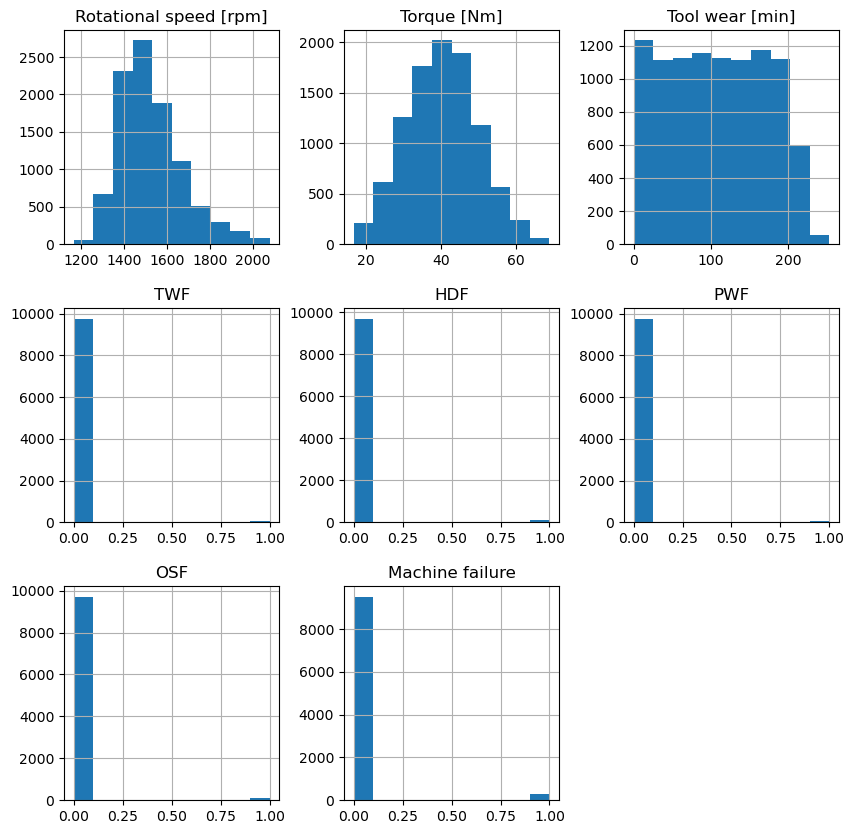

In [6]:
m_df.hist(figsize=(10, 10))

In [7]:
m_df.corr()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
Rotational speed [rpm],1.000000,-0.896295,0.001774,0.005323,-0.139830,-0.073808,-0.115413,-0.169259
Torque [Nm],-0.896295,1.000000,-0.003334,-0.011190,0.148398,0.173543,0.182091,0.236346
Tool wear [min],0.001774,-0.003334,1.000000,0.114036,-0.001260,-0.009493,0.154983,0.115266
TWF,0.005323,-0.011190,0.114036,1.000000,-0.007311,0.018324,0.040376,0.387342
HDF,-0.139830,0.148398,-0.001260,-0.007311,1.000000,0.035208,0.047616,0.628494
PWF,-0.073808,0.173543,-0.009493,0.018324,0.035208,1.000000,0.118673,0.387342
OSF,-0.115413,0.182091,0.154983,0.040376,0.047616,0.118673,1.000000,0.567605
Machine failure,-0.169259,0.236346,0.115266,0.387342,0.628494,0.387342,0.567605,1.000000


In [8]:
m_df.corr()['Machine failure'].sort_values(ascending=False)[1:]

HDF                       0.628494
OSF                       0.567605
TWF                       0.387342
PWF                       0.387342
Torque [Nm]               0.236346
Tool wear [min]           0.115266
Rotational speed [rpm]   -0.169259
Name: Machine failure, dtype: float64

In [9]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# pre_m_df = m_df.copy()

# features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# smote = SMOTE()
# over_X_train, over_y_train = smote.fit_resample(X_train, y_train)

In [10]:
# over_y_train.value_counts()

In [11]:
from sklearn.model_selection import train_test_split

pre_m_df = m_df.copy().reset_index(drop=True)

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [12]:
import numpy as np
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD

torch.manual_seed(124)

torch_X_train = torch.FloatTensor(X_train.values)
torch_y_train = torch.FloatTensor(y_train.values).view(-1, 1)
torch_X_test = torch.FloatTensor(X_test.values)
torch_y_test = torch.FloatTensor(y_test.values).view(-1, 1)

logistic_r = Sequential(
    Linear(7, 1),
    Sigmoid()
)

optimizer = SGD(logistic_r.parameters(), lr=0.000000001)

epochs = 1000

for epoch in range(1, epochs+1):
    H = logistic_r(torch_X_train)

    loss = binary_cross_entropy(H, torch_y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i+1}: {np.round(w.item(), 4)}', end=", ")
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())}\nLoss: {np.round(loss.item(), 4)}')
        print("=" * 40)

Epoch: 100/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 2.9183
Epoch: 200/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 2.9183
Epoch: 300/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 2.9183
Epoch: 400/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 2.9183
Epoch: 500/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 2.9183
Epoch: 600/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 2.9183
Epoch: 700/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 2.9183
Epoch: 800/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 2.9183


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [14]:
get_evaluation(torch_y_test.detach(), logistic_r(torch_X_test) >= 0.5)

오차 행렬
[[1905    0]
 [  57    0]]
정확도: 0.9709, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.linear_model import LogisticRegression

sk_logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)
sk_logistic_r.fit(X_train, y_train)
prediction = sk_logistic_r.predict(X_test)

오차 행렬
[[1905    0]
 [   2   55]]
정확도: 0.9990, 정밀도: 1.0000, 재현율: 0.9649, F1: 0.9821, ROC-AUC: 0.9825
################################################################################


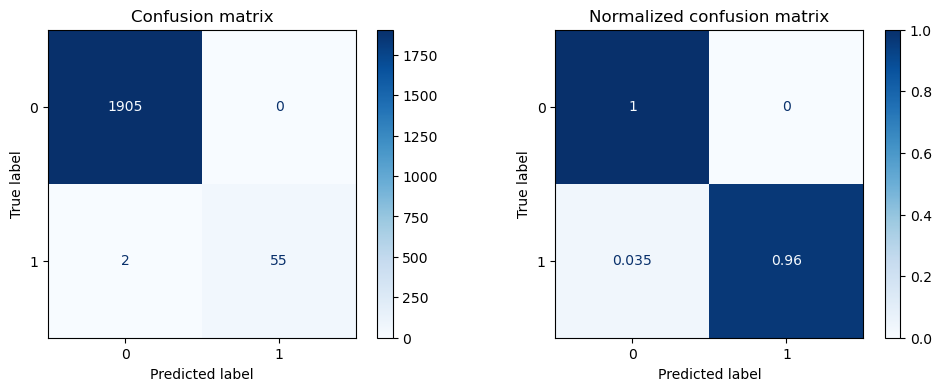

In [16]:
get_evaluation(y_test, prediction, sk_logistic_r, X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

sk_logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=0.1, random_state=124)
sk_logistic_r.fit(X_train, y_train)
prediction = sk_logistic_r.predict(X_test)

오차 행렬
[[1905    0]
 [  23   34]]
정확도: 0.9883, 정밀도: 1.0000, 재현율: 0.5965, F1: 0.7473, ROC-AUC: 0.7982
################################################################################


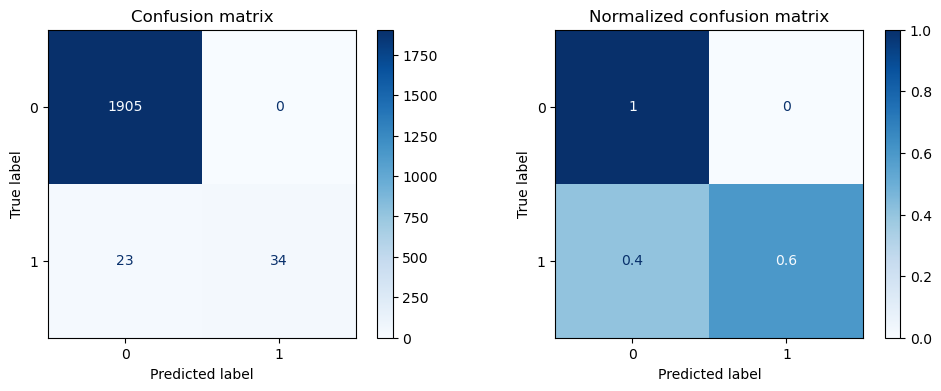

In [18]:
get_evaluation(y_test, prediction, sk_logistic_r, X_test)

In [22]:
# 언더샘플링 진행
pre_m_df['Machine failure'].value_counts()

Machine failure
0    9523
1     286
Name: count, dtype: int64

In [24]:
ones = pre_m_df[pre_m_df['Machine failure'] == 1]
zeros = pre_m_df[pre_m_df['Machine failure'] == 0].sample(n=286, random_state=124)
under_m_df = pd.concat([ones, zeros], axis=0).reset_index(drop=True)
under_m_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1410,65.7,191,0,0,1,1,1
1,1455,41.3,208,1,0,0,0,1
2,1282,60.7,216,0,0,0,1,1
3,1412,52.3,218,0,0,0,1,1
4,1433,62.3,20,0,0,1,0,1
...,...,...,...,...,...,...,...,...
567,1371,55.5,159,0,0,0,0,0
568,1679,30.1,136,0,0,0,0,0
569,1463,44.0,140,0,0,0,0,0
570,1535,34.6,114,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

features, targets = under_m_df.iloc[:, :-1], under_m_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [40]:
import numpy as np
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD

torch.manual_seed(124)

torch_X_train = torch.FloatTensor(X_train.values)
torch_y_train = torch.FloatTensor(y_train.values).view(-1, 1)
torch_X_test = torch.FloatTensor(X_test.values)
torch_y_test = torch.FloatTensor(y_test.values).view(-1, 1)

logistic_r = Sequential(
    Linear(7, 1),
    Sigmoid()
)

optimizer = SGD(logistic_r.parameters(), lr=0.00000001)

epochs = 1000

for epoch in range(1, epochs+1):
    H = logistic_r(torch_X_train)

    loss = binary_cross_entropy(H, torch_y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i+1}: {np.round(w.item(), 4)}', end=", ")
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())}\nLoss: {np.round(loss.item(), 4)}')
        print("=" * 40)

Epoch: 100/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 200/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 300/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 400/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 500/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 600/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 700/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 50.1094
Epoch: 800/1000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0
Loss: 

In [30]:
get_evaluation(torch_y_test.detach(), logistic_r(torch_X_test) >= 0.5)

오차 행렬
[[58  0]
 [57  0]]
정확도: 0.5043, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.linear_model import LogisticRegression

sk_logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)
sk_logistic_r.fit(X_train, y_train)
prediction = sk_logistic_r.predict(X_test)

오차 행렬
[[58  0]
 [ 1 56]]
정확도: 0.9913, 정밀도: 1.0000, 재현율: 0.9825, F1: 0.9912, ROC-AUC: 0.9912
################################################################################


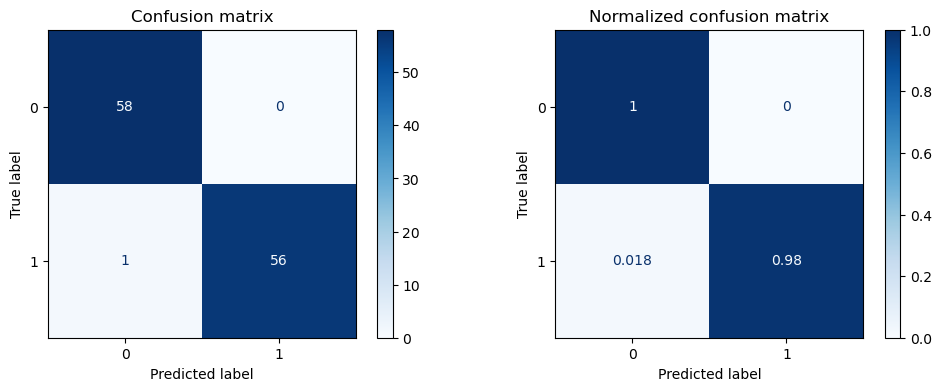

In [32]:
get_evaluation(y_test, prediction, sk_logistic_r, X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

sk_logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=0.01, random_state=124)
sk_logistic_r.fit(X_train, y_train)
prediction = sk_logistic_r.predict(X_test)

오차 행렬
[[48 10]
 [12 45]]
정확도: 0.8087, 정밀도: 0.8182, 재현율: 0.7895, F1: 0.8036, ROC-AUC: 0.8085
################################################################################


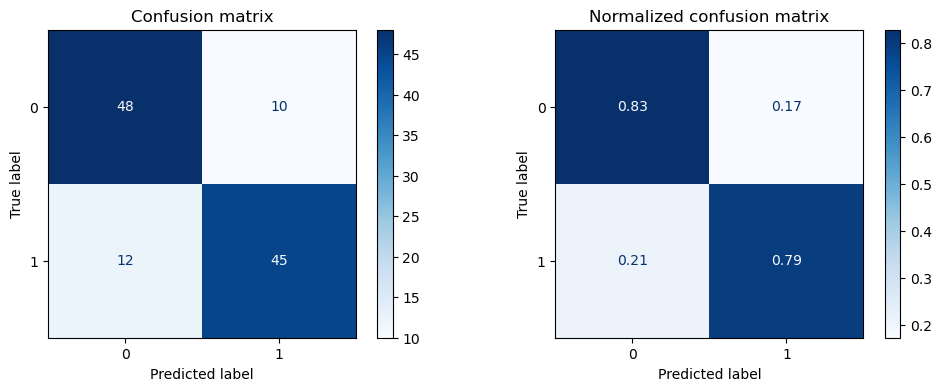

In [36]:
get_evaluation(y_test, prediction, sk_logistic_r, X_test)

In [58]:
import torch
from torch.optim import SGD
from torch.nn.functional import binary_cross_entropy

torch.manual_seed(124)

torch_X_train = torch.FloatTensor(X_train.values)
torch_y_train = torch.FloatTensor(y_train.values).view(-1, 1)
torch_X_test = torch.FloatTensor(X_test.values)
torch_y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros((7, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=0.00099)

epochs = 20000

for epoch in range(1, epochs+1):
    # H = 1 / 1 + torch.exp(-(X_train.matmul(W) + b))
    H = torch.sigmoid(torch_X_train.matmul(W) + b)

    # losses = -(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H))
    # loss = losses.mean()
    loss = binary_cross_entropy(H, torch_y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 2000 == 0:
        print('{:4d}/{}: '.format(epoch, epochs), end='')
        for i, weight in enumerate(list(W)):
            print(f'W{i+1}: {np.round(weight.item(), 4)}', end=", ")
        print('b: {:.4f}, Loss: {:.4f}'.format(b.item(), loss.item()))

2000/20000: W1: -0.0357, W2: 0.0034, W3: 0.0112, W4: 0.0, W5: 0.0001, W6: 0.0, W7: 0.0001, b: 0.0000, Loss: 23.7287
4000/20000: W1: -0.0356, W2: 0.0034, W3: 0.0112, W4: 0.0, W5: 0.0001, W6: 0.0, W7: 0.0001, b: 0.0000, Loss: 23.6725
6000/20000: W1: -0.0355, W2: 0.0034, W3: 0.0112, W4: 0.0, W5: 0.0001, W6: 0.0, W7: 0.0001, b: 0.0000, Loss: 23.6098
8000/20000: W1: -0.0354, W2: 0.0034, W3: 0.0113, W4: 0.0, W5: 0.0001, W6: 0.0, W7: 0.0001, b: 0.0000, Loss: 23.5391
10000/20000: W1: -0.0353, W2: 0.0034, W3: 0.0113, W4: 0.0, W5: 0.0001, W6: 0.0, W7: 0.0001, b: 0.0000, Loss: 23.4582
12000/20000: W1: -0.0352, W2: 0.0034, W3: 0.0113, W4: 0.0, W5: 0.0001, W6: 0.0, W7: 0.0001, b: 0.0000, Loss: 23.3633
14000/20000: W1: -0.035, W2: 0.0034, W3: 0.0113, W4: 0.0, W5: 0.0001, W6: 0.0, W7: 0.0001, b: 0.0000, Loss: 23.2489
16000/20000: W1: -0.0348, W2: 0.0034, W3: 0.0113, W4: 0.0, W5: 0.0001, W6: 0.0, W7: 0.0001, b: 0.0000, Loss: 23.1049
18000/20000: W1: -0.0345, W2: 0.0035, W3: 0.0114, W4: 0.0, W5: 0.0001

In [59]:
H = torch.sigmoid(torch_X_test.matmul(W) + b)
get_evaluation(torch_y_test.detach(), H >= 0.5)

오차 행렬
[[58  0]
 [57  0]]
정확도: 0.5043, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
